In [ ]:
import pandas as pd
import numpy as np
def load_data(file_path):
    """
    Load data from a CSV file and return a DataFrame.

    Parameters:
    file_path (str): The path to the CSV file.

    Returns:
    pd.DataFrame: DataFrame containing the loaded data.
    """
    try:
        data = pd.read_csv(file_path)
        return data
    except Exception as e:
        print(f"Error loading data: {e}")
        return None
#read parquet file
df_train = pd.read_parquet("train_data.parquet", engine='pyarrow')
df_test = pd.read_parquet("test_data.parquet", engine='pyarrow')
df_add_trans = pd.read_parquet("add_trans.parquet", engine='pyarrow')
df_add_event = pd.read_parquet("add_event.parquet", engine='pyarrow')
df_offer = pd.read_parquet("offer_metadata.parquet", engine='pyarrow')

In [ ]:
train = pd.read_parquet('train_data.parquet')  # adjust if your path/filename is different
events = pd.read_parquet('add_event.parquet')
trans = pd.read_parquet('add_trans.parquet')
test = pd.read_parquet('test_data.parquet')
offer = pd.read_parquet('offer_metadata.parquet')
train_offers = set(train['id3'].unique())
event_offers = set(events['id3'].unique())
offers_offers = set(offer['id3'].unique())
test_offers = set(test['id3'].unique())

# Intersections (across all 4)
common_all = train_offers & event_offers & offers_offers & test_offers

# Pairwise and triple intersections
common_train_event = train_offers & event_offers
common_train_offers = train_offers & offers_offers
common_train_test = train_offers & test_offers
common_event_offers = event_offers & offers_offers
common_event_test = event_offers & test_offers
common_offers_test = offers_offers & test_offers

common_train_event_offers = train_offers & event_offers & offers_offers
common_train_event_test = train_offers & event_offers & test_offers
common_train_offers_test = train_offers & offers_offers & test_offers
common_event_offers_test = event_offers & offers_offers & test_offers

# Only in one
only_in_train = train_offers - (event_offers | offers_offers | test_offers)
only_in_event = event_offers - (train_offers | offers_offers | test_offers)
only_in_offers = offers_offers - (train_offers | event_offers | test_offers)
only_in_test  = test_offers  - (train_offers | event_offers | offers_offers)

# Print results
print(f"Unique id3 in train: {len(train_offers)}")
print(f"Unique id3 in events: {len(event_offers)}")
print(f"Unique id3 in offers: {len(offers_offers)}")
print(f"Unique id3 in test: {len(test_offers)}\n")

print(f"Common id3 in ALL FOUR: {len(common_all)}")
print(f"Common id3 in train+event: {len(common_train_event)}")
print(f"Common id3 in train+offers: {len(common_train_offers)}")
print(f"Common id3 in train+test: {len(common_train_test)}")
print(f"Common id3 in event+offers: {len(common_event_offers)}")
print(f"Common id3 in event+test: {len(common_event_test)}")
print(f"Common id3 in offers+test: {len(common_offers_test)}")
print(f"Common id3 in train+event+offers: {len(common_train_event_offers)}")
print(f"Common id3 in train+event+test: {len(common_train_event_test)}")
print(f"Common id3 in train+offers+test: {len(common_train_offers_test)}")
print(f"Common id3 in event+offers+test: {len(common_event_offers_test)}\n")

print(f"Only in train: {len(only_in_train)}")
print(f"Only in event: {len(only_in_event)}")
print(f"Only in offers: {len(only_in_offers)}")
print(f"Only in test: {len(only_in_test)}")


Unique id3 in train: 757
Unique id3 in events: 923
Unique id3 in offers: 4164
Unique id3 in test: 727

Common id3 in ALL FOUR: 0
Common id3 in train+event: 757
Common id3 in train+offers: 0
Common id3 in train+test: 725
Common id3 in event+offers: 0
Common id3 in event+test: 726
Common id3 in offers+test: 0
Common id3 in train+event+offers: 0
Common id3 in train+event+test: 725
Common id3 in train+offers+test: 0
Common id3 in event+offers+test: 0

Only in train: 0
Only in event: 165
Only in offers: 4164
Only in test: 1


Note: you may need to restart the kernel to use updated packages.


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/upsetplot/data.py:385: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the 

<Figure size 1000x600 with 0 Axes>

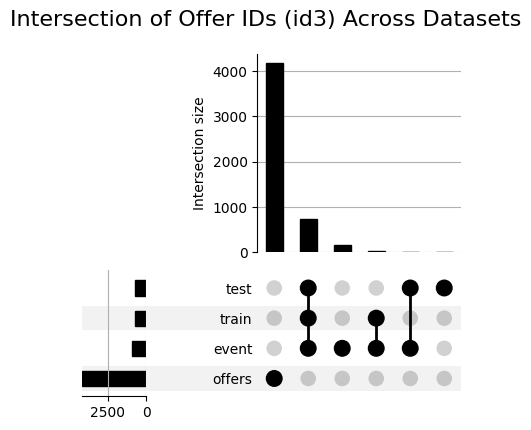

In [ ]:
import matplotlib.pyplot as plt
%pip install upsetplot
from upsetplot import from_contents, UpSet
contents = {
    'train': train_offers,
    'event': event_offers,
    'offers': offers_offers,
    'test': test_offers
}

upset_data = from_contents(contents)

plt.figure(figsize=(10, 6))
UpSet(upset_data, sort_by='cardinality').plot()
plt.suptitle("Intersection of Offer IDs (id3) Across Datasets", fontsize=16)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, roc_auc_score
from sklearn.model_selection import (
    KFold,
    StratifiedKFold,
    cross_val_score,
    train_test_split,
)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from xgboost import XGBClassifier, XGBRegressor

In [ ]:

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score
import pandas as pd
df = pd.read_parquet('train_data.parquet').apply(pd.to_numeric, errors='coerce').fillna(0)
feat_cols = [f'f{i}' for i in range(1, 367)]
X, y = df[feat_cols], df['y']
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, random_state=42)
bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=5, class_weight='balanced'),
    n_estimators=100, max_samples=0.8, max_features=0.8,
    oob_score=True, random_state=42, n_jobs=-1
)
bag.fit(X_train, y_train)
print("Bag OOB score:", bag.oob_score_)
print("Bag AUC:", roc_auc_score(y_val, bag.predict_proba(X_val)[:,1]))
rf = RandomForestClassifier(
    n_estimators=200, max_depth=7,
    class_weight='balanced', oob_score=True,
    random_state=42, n_jobs=-1
)
rf.fit(X_train, y_train)
print("RF OOB score:", rf.oob_score_)
print("RF AUC:", roc_auc_score(y_val, rf.predict_proba(X_val)[:,1]))


Bag OOB score: 0.8966471210460802
Bag AUC: 0.9081149531808228
RF OOB score: 0.906070222273005
RF AUC: 0.9187089199690776


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


0:	test: 0.8139639	best: 0.8139639 (0)	total: 169ms	remaining: 1m 24s
50:	test: 0.9039954	best: 0.9039954 (50)	total: 5s	remaining: 44s
100:	test: 0.9206263	best: 0.9206263 (100)	total: 9.99s	remaining: 39.5s
150:	test: 0.9266821	best: 0.9266821 (150)	total: 15.2s	remaining: 35s
200:	test: 0.9302367	best: 0.9302367 (200)	total: 19.8s	remaining: 29.4s
250:	test: 0.9328236	best: 0.9328236 (250)	total: 25s	remaining: 24.8s
300:	test: 0.9351325	best: 0.9351325 (300)	total: 29.9s	remaining: 19.8s
350:	test: 0.9368116	best: 0.9368116 (350)	total: 34.8s	remaining: 14.8s
400:	test: 0.9382819	best: 0.9382819 (400)	total: 39.3s	remaining: 9.71s
450:	test: 0.9394194	best: 0.9394194 (450)	total: 43.9s	remaining: 4.77s
499:	test: 0.9402680	best: 0.9402680 (499)	total: 48.3s	remaining: 0us

bestTest = 0.9402680116
bestIteration = 499

Validation AUC:      0.9402680116125484
Validation Accuracy: 0.9761090156005531
   feature  shap_importance
0     f366         0.310586
1     f207         0.195033
2  

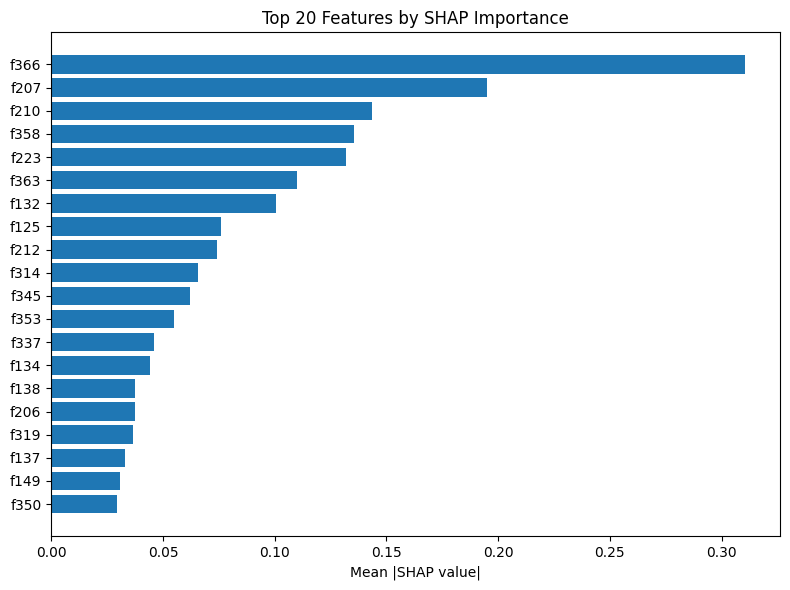

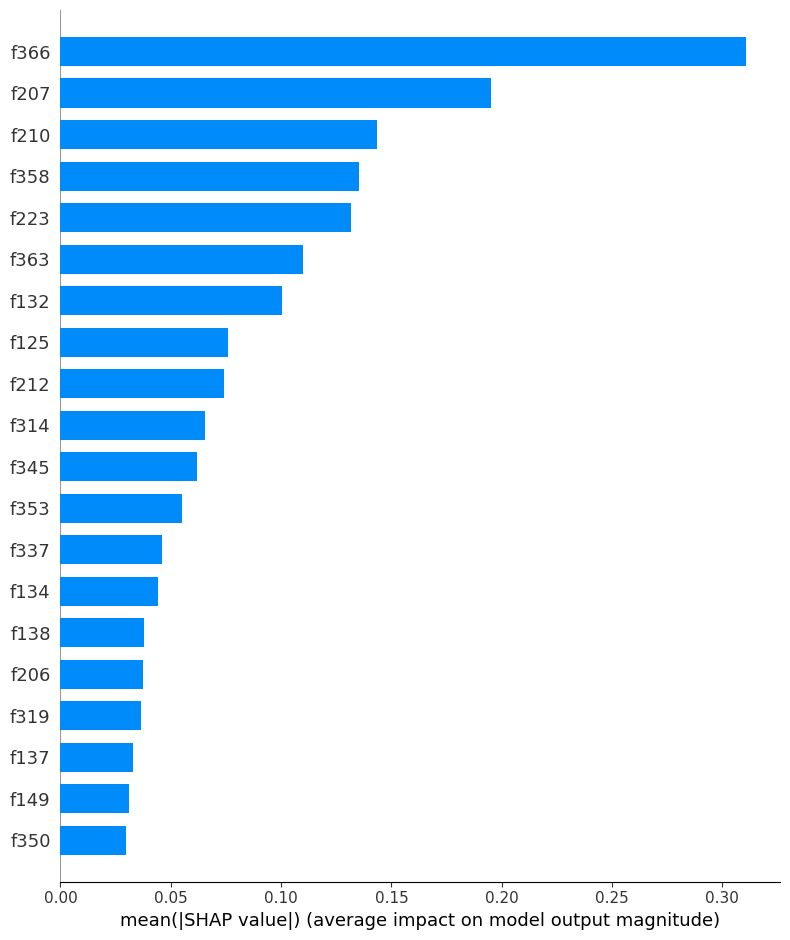

In [ ]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score
import shap
import matplotlib.pyplot as plt
df = pd.read_parquet('train_data.parquet')
df = df.apply(pd.to_numeric, errors='coerce')
feat_cols = [f'f{i}' for i in range(1, 367)]
X = df[feat_cols].fillna(0)
y = df['y']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=feat_cols)
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)
model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    eval_metric='AUC',
    random_seed=42,
    verbose=50
)
model.fit(
    X_train, y_train,
    eval_set=(X_val, y_val),
    early_stopping_rounds=50
)
y_pred_proba = model.predict_proba(X_val)[:,1]
y_pred      = model.predict(X_val)
print("Validation AUC:     ", roc_auc_score(y_val, y_pred_proba))
print("Validation Accuracy:", accuracy_score(y_val, y_pred))
explainer   = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_val)
mean_abs_shap = np.abs(shap_values).mean(axis=0)
shap_imp_df   = (
    pd.DataFrame({
        'feature': feat_cols,
        'shap_importance': mean_abs_shap
    })
    .sort_values('shap_importance', ascending=False)
    .reset_index(drop=True)
)
print(shap_imp_df.head(20))

plt.figure(figsize=(8,6))
plt.barh(
    shap_imp_df['feature'].head(20)[::-1],
    shap_imp_df['shap_importance'].head(20)[::-1]
)
plt.xlabel("Mean |SHAP value|")
plt.title("Top 20 Features by SHAP Importance")
plt.tight_layout()
plt.show()

shap.summary_plot(shap_values, X_val, plot_type="bar")

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([
    ('ros', RandomOverSampler(sampling_strategy=0.5, random_state=42)),  # 1’s = 50% of 0’s
    ('rf', RandomForestClassifier(
        n_estimators=200, max_depth=7,
        oob_score=True, random_state=42, n_jobs=-1
    ))
])

pipe.fit(X_train, y_train)
print("RF+ROS OOB score:", pipe.named_steps['rf'].oob_score_)
print("RF+ROS AUC:", roc_auc_score(y_val, pipe.predict_proba(X_val)[:,1]))


RF+ROS OOB score: 0.8709395442945888
RF+ROS AUC: 0.918543843606437


Top 10 features by importance:
f366    0.079696
f137    0.058987
f132    0.058862
f150    0.044004
f363    0.043351
f134    0.039405
f138    0.037050
f125    0.036531
f130    0.032338
f147    0.030467
dtype: float64


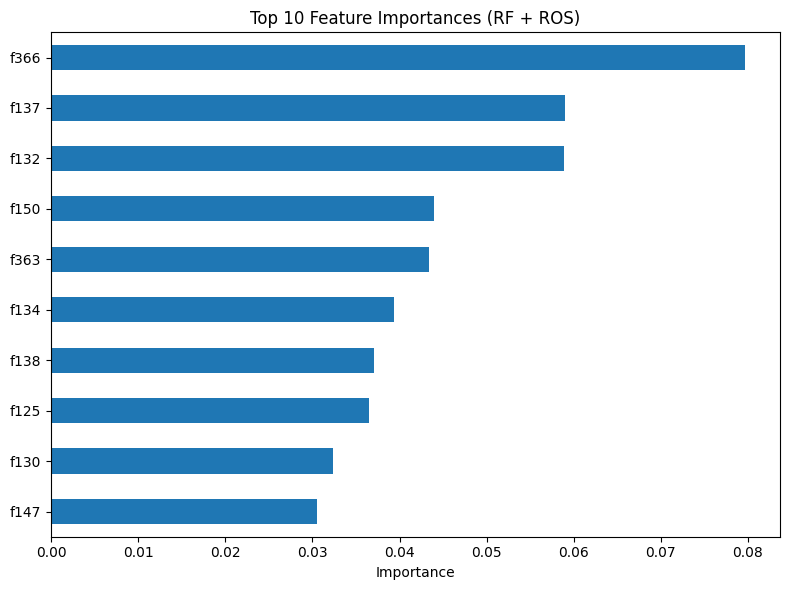

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
rf = pipe.named_steps['rf']
features = X_train.columns
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)
print("Top 10 features by importance:")
print(feat_imp.head(10))

# 5. Bar-plot the top 10
plt.figure(figsize=(8,6))
feat_imp.head(10).sort_values().plot(kind='barh')
plt.title("Top 10 Feature Importances (RF + ROS)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

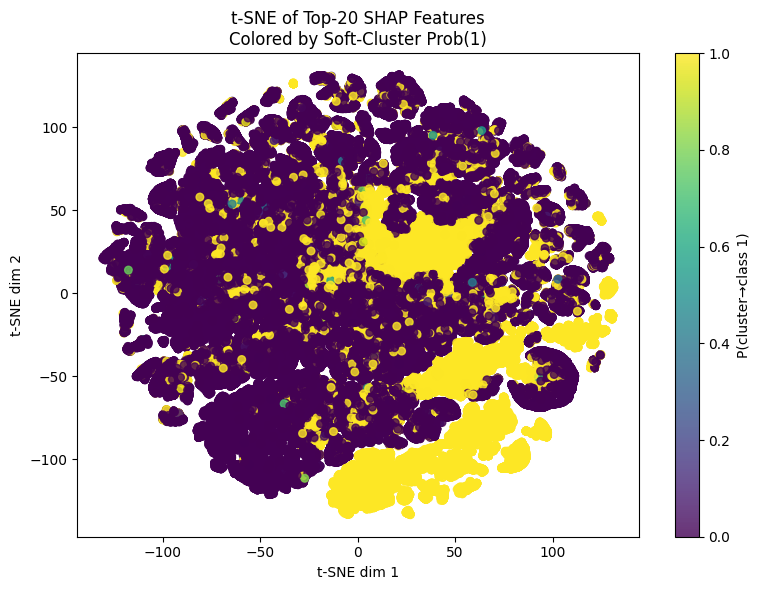

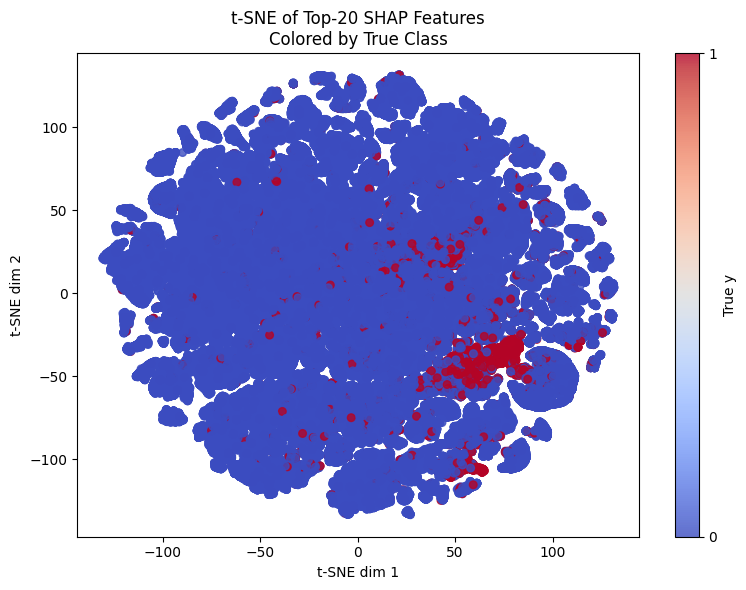

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.mixture import GaussianMixture
top_feats = shap_imp_df['feature'].head(20).tolist()
X_top    = X_val[top_feats]
gmm = GaussianMixture(
    n_components=2,
    covariance_type='full',
    init_params='kmeans',
    n_init=10,
    random_state=42
)
gmm.fit(X_top)
soft_probs  = gmm.predict_proba(X_top)
tsne = TSNE(
    n_components=2,
    init='pca',         # generally speeds up convergence
    learning_rate='auto',
    random_state=42
)
X_embedded = tsne.fit_transform(X_top)   # X_top is your (n_samples×20) array

# 2) Scatter by soft-cluster probability for class “1”
plt.figure(figsize=(8,6))
plt.scatter(
    X_embedded[:,0],
    X_embedded[:,1],
    c=soft_probs[:,1],      # probability of belonging to cluster mapped→class 1
    cmap='viridis',
    s=30,
    alpha=0.8
)
plt.colorbar(label='P(cluster→class 1)')
plt.title("t-SNE of Top-20 SHAP Features\nColored by Soft-Cluster Prob(1)")
plt.xlabel("t-SNE dim 1")
plt.ylabel("t-SNE dim 2")
plt.tight_layout()
plt.show()
plt.figure(figsize=(8,6))
plt.scatter(
    X_embedded[:,0],
    X_embedded[:,1],
    c=y_val,                # true binary labels 0/1
    cmap='coolwarm',
    s=30,
    alpha=0.8
)
plt.colorbar(ticks=[0,1], label='True y')
plt.title("t-SNE of Top-20 SHAP Features\nColored by True Class")
plt.xlabel("t-SNE dim 1")
plt.ylabel("t-SNE dim 2")
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
df = df_add_trans.copy()
df['f370'] = pd.to_datetime(df['f370'])
ref_date = df['f370'].max()

windows = [7,30,90,180]
rfm_list = []
for w in windows:
    mask = df['f370'] >= ref_date - pd.Timedelta(days=w)
    agg = df.loc[mask].groupby('id2')['f367'].agg([
        (f'txn_cnt_{w}d','count'),
        (f'txn_amt_sum_{w}d','sum'),
        (f'txn_amt_mean_{w}d','mean'),
        (f'txn_amt_median_{w}d','median'),
        (f'txn_amt_max_{w}d','max'),
        (f'txn_amt_std_{w}d','std'),
    ])
    rfm_list.append(agg)
rfm_df = pd.concat(rfm_list, axis=1)

In [ ]:
rfm_df

,txn_cnt_7d,txn_amt_sum_7d,txn_amt_mean_7d,txn_amt_median_7d,txn_amt_max_7d,txn_amt_std_7d,txn_cnt_30d,txn_amt_sum_30d,txn_amt_mean_30d,txn_amt_median_30d,...,txn_amt_mean_90d,txn_amt_median_90d,txn_amt_max_90d,txn_amt_std_90d,txn_cnt_180d,txn_amt_sum_180d,txn_amt_mean_180d,txn_amt_median_180d,txn_amt_max_180d,txn_amt_std_180d
id2,,,,,,,,,,,,,,,,,,,,,
2000010,4.0,1101.58,275.395000,212.05,625.64,246.121231,11.0,1363.01,123.91000,26.670,...,165.738333,39.255,625.85,229.815205,12,1988.86,165.738333,39.255,625.85,229.815205
2000023,11.0,179.65,16.331818,16.05,38.00,12.922558,31.0,711.18,22.94129,14.540,...,22.277188,13.310,100.00,25.327353,32,712.87,22.277188,13.310,100.00,25.327353
2000025,5.0,513.74,102.748000,66.86,250.00,106.759775,10.0,774.49,77.44900,73.395,...,77.449000,73.395,250.00,82.155547,10,774.49,77.449000,73.395,250.00,82.155547
2000026,5.0,1127.37,225.474000,159.87,498.90,217.615735,24.0,8813.85,367.24375,226.175,...,424.188621,243.600,1521.10,402.801807,29,12301.47,424.188621,243.600,1521.10,402.801807
2000032,1.0,124.03,124.030000,124.03,124.03,NaN,1.0,124.03,124.03000,124.030,...,124.030000,124.030,124.03,NaN,1,124.03,124.030000,124.030,124.03,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2892256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,38.350000,38.350,38.35,NaN,1,38.35,38.350000,38.350,38.35,NaN
2895734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,400.000000,400.000,400.00,NaN,1,400.00,400.000000,400.000,400.00,NaN
2896685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.000000,10.000,10.00,NaN,1,10.00,10.000000,10.000,10.00,NaN


0:	test: 0.8478517	best: 0.8478517 (0)	total: 193ms	remaining: 1m 36s
50:	test: 0.9047236	best: 0.9047236 (50)	total: 6.75s	remaining: 59.5s
100:	test: 0.9203959	best: 0.9203959 (100)	total: 12.9s	remaining: 51.1s
150:	test: 0.9267795	best: 0.9267795 (150)	total: 19.1s	remaining: 44.2s
200:	test: 0.9299029	best: 0.9299029 (200)	total: 25s	remaining: 37.2s
250:	test: 0.9326321	best: 0.9326321 (250)	total: 31.2s	remaining: 30.9s
300:	test: 0.9353065	best: 0.9353065 (300)	total: 37.2s	remaining: 24.6s
350:	test: 0.9370027	best: 0.9370027 (350)	total: 43.4s	remaining: 18.4s
400:	test: 0.9382624	best: 0.9382624 (400)	total: 49.3s	remaining: 12.2s
450:	test: 0.9395044	best: 0.9395044 (450)	total: 55.5s	remaining: 6.03s
499:	test: 0.9404852	best: 0.9404852 (499)	total: 1m 1s	remaining: 0us

bestTest = 0.9404852207
bestIteration = 499

Validation AUC: 0.9404852206503919
Validation Accuracy: 0.976121999831205


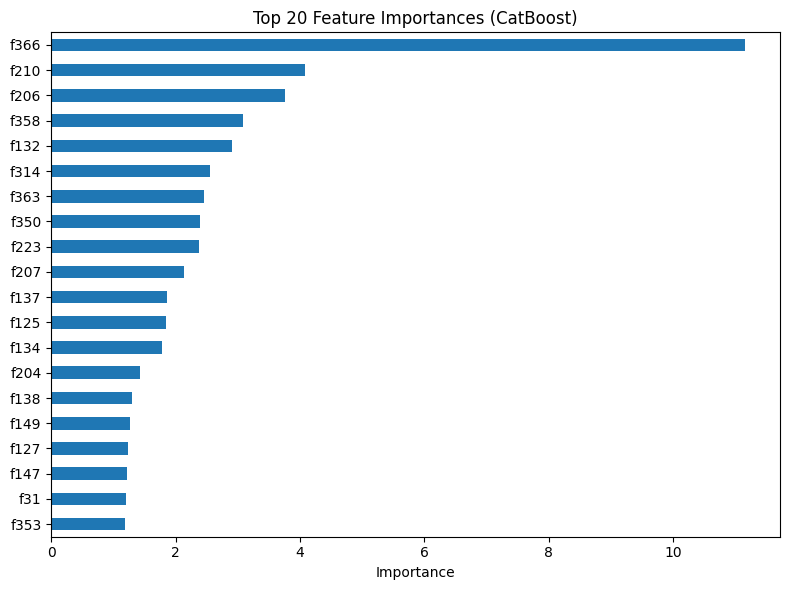

In [ ]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score
df = pd.read_parquet('train_data.parquet')
df = df.apply(pd.to_numeric, errors='coerce')
feat_cols = [f'f{i}' for i in range(1, 367)]    # f1, f2, …, f66
X = df[feat_cols]
y = df['y']
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)
model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    eval_metric='AUC',
    random_seed=42,
    verbose=50,
    use_best_model=True
)
model.fit(
    X_train, y_train,
    eval_set=(X_val, y_val),
    early_stopping_rounds=50
)
y_pred_proba = model.predict_proba(X_val)[:,1]
y_pred = model.predict(X_val)
print("Validation AUC:", roc_auc_score(y_val, y_pred_proba))
print("Validation Accuracy:", accuracy_score(y_val, y_pred))
import matplotlib.pyplot as plt

importances = model.get_feature_importance(type='FeatureImportance')
feat_imp = pd.Series(importances, index=feat_cols).sort_values(ascending=False)

plt.figure(figsize=(8,6))
feat_imp.head(20).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title('Top 20 Feature Importances (CatBoost)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

In [ ]:
import argparse
import pandas as pd
import numpy as np
import joblib
import xgboost as xgb
import gc
from sklearn.preprocessing import LabelEncoder
def main(args):
    print("Loading all datasets...")
    df = pd.read_parquet(args.train_file)
    df_test = pd.read_parquet(args.test_file)
    offer_meta_df = pd.read_parquet(args.offer_meta_file)
    add_trans_df = pd.read_parquet(args.trans_file)
    submission_template = pd.read_csv(args.submission_file)
    print("Starting feature engineering...")
    offer_meta_df = offer_meta_df.rename(columns={'id10': 'offer_category', 'id11': 'brand'})
    for col in ['id2', 'id3']:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df_test[col] = pd.to_numeric(df_test[col], errors='coerce')
    offer_meta_df['id3'] = pd.to_numeric(offer_meta_df['id3'], errors='coerce')
    add_trans_df['id2'] = pd.to_numeric(add_trans_df['id2'], errors='coerce')
    df['source'] = 'train'
    df_test['source'] = 'test'
    df_test['y'] = -1 # Placeholder
    combined_df = pd.concat([df, df_test], ignore_index=True)
    combined_df = combined_df.merge(offer_meta_df, on='id3', how='left')
    for col in ['brand', 'offer_category']:
        le = LabelEncoder()
        combined_df[col] = le.fit_transform(combined_df[col].astype(str))
        print(f"Encoded '{col}' feature.")
    combined_df['id4'] = pd.to_datetime(combined_df['id4'], errors='coerce')
    combined_df['id12'] = pd.to_datetime(combined_df['id12'], errors='coerce')
    combined_df['id13'] = pd.to_datetime(combined_df['id13'], errors='coerce')
    combined_df['impression_hour'] = combined_df['id4'].dt.hour
    combined_df['impression_dayofweek'] = combined_df['id4'].dt.dayofweek
    combined_df['offer_duration_days'] = (combined_df['id13'] - combined_df['id12']).dt.days
    combined_df.sort_values(by=['id2', 'id4'], inplace=True)
    combined_df['time_since_last_impression'] = combined_df.groupby('id2')['id4'].diff().dt.total_seconds()
    combined_df['user_offer_impression_count'] = combined_df.groupby(['id2', 'id3']).cumcount()
    print("Created advanced time-based and interaction features.")
    # --- NEW: Bayesian Target Encoding ---
    # This approach creates more robust CTR features. Instead of a simple mean, it
    # smooths the CTR of a category towards the global average. This prevents overfitting
    # on categories with very few samples.
    # P(click | category) is estimated by blending the category's observed CTR
    # with the overall CTR of all data.
    train_for_features = combined_df[combined_df['source'] == 'train'].copy()
    train_for_features['y'] = pd.to_numeric(train_for_features['y'], errors='coerce')
    global_ctr = train_for_features['y'].mean()
    print(f"Global CTR (prior): {global_ctr:.4f}")
    smoothing_factor = 20
    def bayesian_target_encode(group_col):
        """Calculates smoothed CTR for a given feature."""
        agg = train_for_features.groupby(group_col)['y'].agg(['mean', 'count'])
        smoothed_mean = (agg['mean'] * agg['count'] + global_ctr * smoothing_factor) / (agg['count'] + smoothing_factor)
        return smoothed_mean.rename(f'{group_col}_bayes_ctr')
    for col in ['id3', 'id2', 'brand', 'offer_category']:
        print(f"Applying Bayesian Target Encoding for '{col}'...")
        encoded_feature = bayesian_target_encode(col)
        combined_df = combined_df.merge(encoded_feature, on=col, how='left')
    user_trans_agg = add_trans_df.groupby('id2')['f367'].agg(['count', 'sum', 'mean']).rename(columns={'count': 'user_trans_count', 'sum': 'user_total_spend', 'mean': 'user_avg_spend'})
    combined_df = combined_df.merge(user_trans_agg, on='id2', how='left')
    print("Cleaning and selecting final features...")

    f_cols = [f'f{i}' for i in range(1, 367)]
    miss_pct = combined_df[f_cols].isnull().mean() * 100
    drop_cols = miss_pct[miss_pct > 90].index.tolist()
    if drop_cols:
        print(f"Dropping {len(drop_cols)} sparse features with >95% missing values.")
    engineered_features = [
        'offer_category', 'brand',
        'impression_hour', 'impression_dayofweek', 'offer_duration_days',
        'time_since_last_impression', 'user_offer_impression_count',
        'id3_bayes_ctr', 'id2_bayes_ctr', 'brand_bayes_ctr', 'offer_category_bayes_ctr', # NEW Bayesian Features
        'user_trans_count', 'user_total_spend', 'user_avg_spend'
    ]

    base_features = [c for c in f_cols if c not in drop_cols]
    features = base_features + engineered_features
    print(f"Training model with {len(features)} features.")
    df = combined_df[combined_df['source'] == 'train'].copy()
    df_test = combined_df[combined_df['source'] == 'test'].copy()
    del combined_df, train_for_features, offer_meta_df, add_trans_df, user_trans_agg
    gc.collect()
    X = df[features].apply(pd.to_numeric, errors='coerce').fillna(0)
    y = pd.to_numeric(df['y'], errors='coerce').astype(int)
    print("Performing time-based train-validation split...")
    df['id5'] = pd.to_datetime(df['id5'], errors='coerce')
    validation_date = df['id5'].max()
    train_idx = df[df['id5'] < validation_date].index
    val_idx = df[df['id5'] == validation_date].index
    X_train, y_train = X.loc[train_idx], y.loc[train_idx]
    X_val, y_val = X.loc[val_idx], y.loc[val_idx]
    print(f"Train shape: {X_train.shape}, Validation shape: {X_val.shape}")
    neg, pos = np.bincount(y_train)
    scale_pos_weight = neg / pos if pos > 0 else 1.0
    print(f"scale_pos_weight for handling class imbalance = {scale_pos_weight:.2f}")
    """
    model = xgb.XGBClassifier(
        objective='binary:logistic',
        tree_method='gpu_hist',
        predictor='gpu_predictor',
        gpu_id=0,
        n_estimators=args.n_estimators,
        max_depth=args.max_depth,
        learning_rate=args.lr,
        subsample=0.8,
        colsample_bytree=0.8,
        gamma=1.0,
        min_child_weight=5,
        reg_alpha=1.0,
        reg_lambda=1.0,
        scale_pos_weight=scale_pos_weight,
        use_label_encoder=False,
        eval_metric='auc',
        n_jobs=args.n_jobs
    )
    """
    model = xgb.XGBClassifier(
        objective='binary:logistic',
        tree_method='hist',          # CPU-friendly histogram algorithm
        n_estimators=args.n_estimators,
        max_depth=args.max_depth,
        learning_rate=args.lr,
        subsample=0.8,
        colsample_bytree=0.8,
        gamma=1.0,
        min_child_weight=5,
        reg_alpha=1.0,
        reg_lambda=1.0,
        scale_pos_weight=scale_pos_weight,
        use_label_encoder=False,
        eval_metric='auc',
        n_jobs=args.n_jobs
    )
    print("Training XGBoost model with early stopping...")
    model.fit(
        X_train, y_train,
        eval_set=[(X_train, y_train), (X_val, y_val)],
        verbose=50
    )
    joblib.dump(model, args.model_out)
    print(f"Saved model to {args.model_out}")
    print("Performing inference on test data...")
    X_test = df_test[features].apply(pd.to_numeric, errors='coerce').fillna(0)
    df_test['pred'] = model.predict_proba(X_test)[:, 1]
    final_submission = pd.merge(submission_template[['id1']], df_test[['id1', 'pred']], on='id1', how='left')
    final_submission.to_csv(args.preds_out, index=False)
    print(f"Saved final predictions to {args.preds_out}")
if __name__ == '__main__':
    parser = argparse.ArgumentParser(description="Train an XGBoost model with Bayesian target encoding.")
    #DATA_PATH = '/kaggle/input/amex-dataset1/'
    #DATA_PATH = '/Users/suyashjindal/Downloads/AMERICANEXP/'
    DATA_PATH = '/content/'
    parser.add_argument('--train_file', default=f'{DATA_PATH}train_data.parquet')
    parser.add_argument('--test_file', default=f'{DATA_PATH}test_data.parquet')
    parser.add_argument('--offer_meta_file', default=f'{DATA_PATH}offer_metadata.parquet')
    parser.add_argument('--trans_file', default=f'{DATA_PATH}add_trans.parquet')
    parser.add_argument('--submission_file', default=f'{DATA_PATH}submission_template.csv')
    parser.add_argument('--model_out', default='xgb_model_bayes_final.joblib')
    parser.add_argument('--preds_out', default='submission_bayes.csv')
    parser.add_argument('--n_estimators', type=int, default=1000)
    parser.add_argument('--max_depth', type=int, default=7)
    parser.add_argument('--lr', type=float, default=0.02)
    parser.add_argument('--n_jobs', type=int, default=-1)

    #args = parser.parse_args([])
    args, _ = parser.parse_known_args()
    main(args)




Loading all datasets...
Starting feature engineering...
Encoded 'brand' feature.
Encoded 'offer_category' feature.
Created advanced time-based and interaction features.
Global CTR (prior): 0.0481
Applying Bayesian Target Encoding for 'id3'...
Applying Bayesian Target Encoding for 'id2'...
Applying Bayesian Target Encoding for 'brand'...
Applying Bayesian Target Encoding for 'offer_category'...
Cleaning and selecting final features...
Dropping 38 sparse features with >95% missing values.
Training model with 342 features.
Performing time-based train-validation split...
Train shape: (548319, 342), Validation shape: (221845, 342)
scale_pos_weight for handling class imbalance = 18.29
Training XGBoost model with early stopping...
[0]	validation_0-auc:0.98023	validation_1-auc:0.96113


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [23:04:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[50]	validation_0-auc:0.98756	validation_1-auc:0.97775
[100]	validation_0-auc:0.98890	validation_1-auc:0.97912
[150]	validation_0-auc:0.98997	validation_1-auc:0.97968
[200]	validation_0-auc:0.99077	validation_1-auc:0.98035
[250]	validation_0-auc:0.99146	validation_1-auc:0.98076
[300]	validation_0-auc:0.99206	validation_1-auc:0.98099
[350]	validation_0-auc:0.99274	validation_1-auc:0.98112
[400]	validation_0-auc:0.99332	validation_1-auc:0.98113
[450]	validation_0-auc:0.99383	validation_1-auc:0.98104
[500]	validation_0-auc:0.99428	validation_1-auc:0.98095
[550]	validation_0-auc:0.99469	validation_1-auc:0.98094
[600]	validation_0-auc:0.99504	validation_1-auc:0.98086
[650]	validation_0-auc:0.99537	validation_1-auc:0.98079
[700]	validation_0-auc:0.99568	validation_1-auc:0.98070
[750]	validation_0-auc:0.99595	validation_1-auc:0.98065
[800]	validation_0-auc:0.99622	validation_1-auc:0.98060
[850]	validation_0-auc:0.99647	validation_1-auc:0.98053
[900]	validation_0-auc:0.99668	validation_1-auc:0

##Feature Engineering using events and offer data files

In [ ]:
import pandas as pd
import numpy as np

# 1. Load data
train = pd.read_parquet('train_data.parquet')
events = pd.read_parquet('add_event.parquet')
offers = pd.read_parquet('offer_metadata.parquet')
train['id2']  = pd.to_numeric(train['id2'], errors='raise').astype('int64')
events['id2'] = pd.to_numeric(events['id2'], errors='raise').astype('int64')
train['id3']  = pd.to_numeric(train['id3'], errors='raise').astype('int64')
events['id3'] = pd.to_numeric(events['id3'], errors='raise').astype('int64')
offers['id3'] = pd.to_numeric(offers['id3'], errors='raise').astype('int64')
events['impression_ts'] = pd.to_datetime(events['id4'])
events['click_ts']      = pd.to_datetime(events['id7'])
offers['start_ts']      = pd.to_datetime(offers['id12'])
offers['end_ts']        = pd.to_datetime(offers['id13'])

# 3. EVENT-BASED FEATURES (grouped by customer + offer)
# -----------------------------------------------------------------
# 3a) Per (customer=id2, offer=id3): total impressions & clicks
grp_ce = (
    events
    .groupby(['id2','id3'])
    .agg(
        impr_count = ('impression_ts','count'),
        click_count= ('click_ts','count'),
        first_impr = ('impression_ts','min'),
        last_impr  = ('impression_ts','max'),
        first_click= ('click_ts','min'),
        last_click = ('click_ts','max'),
    )
    .reset_index()
)
# 3b) Derive CTR and recency
grp_ce['ctr_cust_offer'] = grp_ce['click_count'] / grp_ce['impr_count'].clip(1)
grp_ce['days_since_last_impr'] = (pd.Timestamp.today() - grp_ce['last_impr']).dt.days

# 3c) Offer-level stats (across all customers)
grp_offer = (
    events
    .groupby('id3')
    .agg(
        total_impr_offer = ('impression_ts','count'),
        total_click_offer= ('click_ts','count')
    )
    .assign(
        ctr_offer = lambda df: df['total_click_offer'] / df['total_impr_offer'].clip(1)
    )
    .reset_index()
)
df = train.merge(
    grp_ce,
    on=['id2','id3'],
    how='left'
).merge(
    grp_offer,
    on='id3',
    how='left'
)

offer_feats = offers[[
    'id3',        # key
    'f375',       # redemption frequency
    'f376',       # discount rate
    'f377',       # random
    'id10',       # industry code
    'id11',       # brand name
    'f378',       # offerings body (text, consider length)
    'f374',       # card member industry name
    'id8',        # member industry code
    'start_ts',
    'end_ts'
]].copy()

# 5a) Simple derived features
offer_feats['offer_duration_days'] = (offer_feats['end_ts'] - offer_feats['start_ts']).dt.days
offer_feats['body_length']         = offer_feats['f378'].str.len()
offer_feats = offer_feats.drop(columns=['f378','start_ts','end_ts'])

# 5c) Merge into df
df = df.merge(offer_feats, on='id3', how='left')
fill_zero = [
    'impr_count','click_count','ctr_cust_offer','days_since_last_impr',
    'total_impr_offer','total_click_offer','ctr_offer'
]
df[fill_zero] = df[fill_zero].fillna(0)
feature_cols = [
    *[c for c in train.columns if c.startswith('f')],
    'impr_count','click_count','ctr_cust_offer','days_since_last_impr',
    'total_impr_offer','total_click_offer','ctr_offer',
    'f375','f376','f377','offer_duration_days','body_length'
]
X = df[feature_cols]
y = df['y']

print("Engineered feature matrix shape:", X.shape)
print("Example row:")
print(df[feature_cols + ['id2','id3']].head())



Label Encoding done
Read data dictionay file and its type and done mapping  && encode categorical variables

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
dict_df = pd.read_csv('data_dictionary.csv')
train_df = pd.read_parquet('train_data.parquet')
feat_cols = [col for col in train_df.columns if col.startswith('f')][:366]
mapping_df = pd.DataFrame({'feature': feat_cols})
mapping_df = mapping_df.merge(
    dict_df[['masked_column', 'Type']],
    left_on='feature', right_on='masked_column',
    how='left'
)[['feature', 'Type']]
df_num = train_df.copy()
df_num[feat_cols] = df_num[feat_cols].apply(pd.to_numeric, errors='coerce')

df_num[feat_cols] = df_num[feat_cols].fillna(0)
cat_feats = mapping_df.loc[mapping_df.Type == 'Categorical', 'feature'].tolist()
for col in cat_feats:
    le = LabelEncoder()
    df_num[col] = le.fit_transform(df_num[col].astype(str))

df_num[feat_cols].head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f357,f358,f359,f360,f361,f362,f363,f364,f365,f366
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,...,0.0,-9999.0,0.0,0.0,28.0,0.0,0.00000,337.0,0.0,0.00000
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,...,0.0,0.0,0.0,0.0,87.0,0.0,0.00000,1010.0,2.0,0.00198
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,...,0.0,0.0,0.0,0.0,23.0,0.0,0.00000,1010.0,2.0,0.00198
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,...,0.0,-9999.0,0.0,0.0,277.0,1.0,0.00361,337.0,0.0,0.00000
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,...,0.0,-9999.0,0.0,0.0,359.0,0.0,0.00000,337.0,0.0,0.00000


In [ ]:
# read
df_num

,id1,id2,id3,id4,id5,y,f1,f2,f3,f4,...,f357,f358,f359,f360,f361,f362,f363,f364,f365,f366
0,1366776_189706075_16-23_2023-11-02 22:22:00.042,1366776,189706075,2023-11-02 22:22:00.042,2023-11-02,0,1.0,0.0,0.0,0.0,...,0.000000,-9999.000000,0.0,0.0,28.0,0.0,0.000000,337.0,0.0,0.000000
1,1366776_89227_16-23_2023-11-01 23:51:24.999,1366776,89227,2023-11-01 23:51:24.999,2023-11-01,0,1.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,87.0,0.0,0.000000,1010.0,2.0,0.001980
2,1366776_35046_16-23_2023-11-01 00:30:59.797,1366776,35046,2023-11-01 00:30:59.797,2023-11-01,0,1.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,23.0,0.0,0.000000,1010.0,2.0,0.001980
3,1366776_6275451_16-23_2023-11-02 22:21:32.261,1366776,6275451,2023-11-02 22:21:32.261,2023-11-02,0,1.0,0.0,0.0,0.0,...,0.000000,-9999.000000,0.0,0.0,277.0,1.0,0.003610,337.0,0.0,0.000000
4,1366776_78053_16-23_2023-11-02 22:21:34.799,1366776,78053,2023-11-02 22:21:34.799,2023-11-02,0,1.0,0.0,0.0,0.0,...,0.000000,-9999.000000,0.0,0.0,359.0,0.0,0.000000,337.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770159,1896641_87731_16-23_2023-11-02 08:14:21.524,1896641,87731,2023-11-02 08:14:21.524,2023-11-02,0,0.0,0.0,0.0,0.0,...,0.002101,0.040404,0.0,0.0,90.0,1.0,0.011111,282.0,1.0,0.003546
770160,1896641_505604_16-23_2023-11-02 08:14:24.458,1896641,505604,2023-11-02 08:14:24.458,2023-11-02,0,0.0,0.0,0.0,0.0,...,-0.000584,0.050650,0.0,0.0,33.0,0.0,0.000000,58.0,1.0,0.017241
770161,1896641_25212_16-23_2023-11-02 08:14:25.748,1896641,25212,2023-11-02 08:14:25.748,2023-11-02,0,0.0,0.0,0.0,0.0,...,0.000354,0.049871,0.0,0.0,33.0,0.0,0.000000,58.0,1.0,0.017241
770162,1900765_95157_16-23_2023-11-02 06:08:25.900,1900765,95157,2023-11-02 06:08:25.900,2023-11-02,0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
